[2.71917485 0.20003612]
M: -6.661338147750939e-16
D: 9.055514440918365


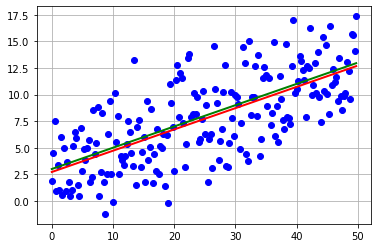

In [7]:
import numpy as np
import matplotlib.pyplot as plt

TOTAL = 200
STEP = 0.25


def func(x):
    return 0.2 * x + 3


def prediction(theta):
    return theta[0] + theta[1] * x


def generate_sample(total=TOTAL):
    x = 0
    while x < total * STEP:
        yield func(x) + np.random.uniform(-1, 1) * np.random.uniform(2, 8)
        x += STEP


X = np.arange(0, TOTAL * STEP, STEP)
Y = np.array([y for y in generate_sample(TOTAL)])
Y_real = np.array([func(x) for x in X])


A = np.empty((TOTAL, 2))
A[:, 0] = 1
A[:, 1] = X

theta = np.linalg.pinv(A).dot(Y)
print(theta)
Y_prediction = A.dot(theta)

error = Y - Y_prediction
error_squared = error ** 2
M = sum(error) / len(error)
M_squared = M ** 2
D = sum([sq - M_squared for sq in error_squared]) / len(error)

print("M:", M)
print("D:", D)

plt.plot(X, Y, 'bo')
plt.plot(X, Y_real, 'g', linewidth=2.0)
plt.plot(X, Y_prediction, 'r', linewidth=2.0)
plt.grid()
plt.show()